![title](https://i.pinimg.com/originals/b9/4d/4f/b94d4f336d6cdbbc9332bd15027fd3bc.jpg)

# Cocktail Generation

We will use a dataset from Kaggle which can be found here :
https://www.kaggle.com/jenlooper/mr-boston-cocktail-dataset/data

### Exploration of the dataset and creation of usefull variables/tables

In [0]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from scipy.special import softmax
%matplotlib inline

In [0]:
  data = pd.read_csv("../mr-boston-flattened.csv")
  data = data.drop(['measurement-1', 'measurement-2', 'measurement-3', 'measurement-4', 'measurement-5', 'measurement-6', 'name', 'category', 'glass-size', 'instructions', 'glass'], axis=1)
  data = data.apply(pd.Series.drop_duplicates, axis=1) #We have one line with the same element 2 times so we keep only unique ingredients per cocktail

In [3]:
nb_cocktail = data.shape[0]
print(nb_cocktail)

990


Let's get a list of all the ingredients :

In [0]:
ingredients = list(data['ingredient-1'].unique().tolist()+data['ingredient-2'].unique().tolist()+data['ingredient-3'].unique().tolist()+data['ingredient-4'].unique().tolist()+data['ingredient-5'].unique().tolist()+data['ingredient-6'].unique().tolist())
ingredients = [str(i).strip().lower().replace(' mr. boston','') for i in ingredients]
ingredients = (list(set(ingredients)))
ingredients.remove('nan')

In [5]:
print('number of ingredients : '+ str(len(ingredients)))
for _ in range (10):
    i = np.random.randint(0,len(ingredients)-1)
    print(ingredients[i])

number of ingredients : 652
lemon wedge, cinnamon sugar
fresh basil leaves
lemon slice
vanilla-flavored vodka
vanilla-infused bourbon
light vermouth
peach schnapps
peach liqueur
lump sugar
old five star brandy


Now let's see the probability for each ingredient to be in a cocktail :

In [0]:
ingr_prob = [0] * len(ingredients)
for index, row in data.iterrows():
    for i in range (6):
        try:
            ingr = str(row[i]).strip().lower().replace(' mr. boston','')
            ingr_prob[ingredients.index(ingr)] = ingr_prob[ingredients.index(ingr)] + 1
        except:
            pass
ingr_prob = [i/sum(ingr_prob) for i in ingr_prob]

A loooooot of our ingredients are present only one time so results are probably not gonna be insane, but I'm tired af let's go

Now we want to see the chances to have two ingredients in a cocktail :

In [7]:
table = np.zeros((len(ingredients),len(ingredients)))
for index, row in data.iterrows():
    for i in range (6):
        for j in range (6):
            if (i!=j):
                try:
                    table[ingredients.index(str(row[i]).strip().lower().replace(' mr. boston',''))][ingredients.index(str(row[j]).strip().lower().replace(' mr. boston',''))] = table[ingredients.index(str(row[i]).strip().lower().replace(' mr. boston',''))][ingredients.index(str(row[j]).strip().lower().replace(' mr. boston',''))]+1
                except:
                    pass
    if (index%100==0):
        print('cocktail n°'+str(index)+' processed')
 

cocktail n°0 processed
cocktail n°100 processed
cocktail n°200 processed
cocktail n°300 processed
cocktail n°400 processed
cocktail n°500 processed
cocktail n°600 processed
cocktail n°700 processed
cocktail n°800 processed
cocktail n°900 processed


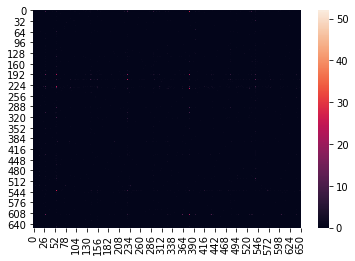

In [8]:
sn.heatmap(table)

Unsurprisingly the most present ingredients (gin & vodka) are way more representated. What will interest us more is the probability to have an ingredient if you know another is in the cocktail :

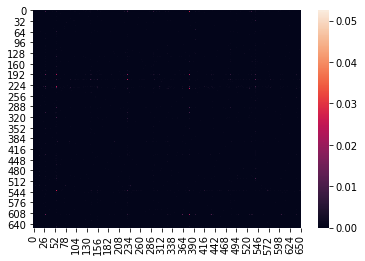

In [9]:
table_normalized = table/nb_cocktail
sn.heatmap(table_normalized)

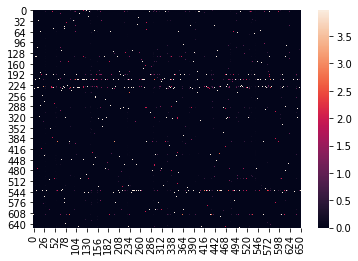

In [10]:
conditional = table_normalized/np.array(ingr_prob)
sn.heatmap(conditional)

In [0]:
# We need a table in which the sum of all rows is equal to 1 (in order to use np.random.choice)
proba_table = conditional/conditional.sum(axis=0, keepdims=True)

In [0]:
def make_a_cocktail(first_ingredient=None):
    cocktail = []
    if first_ingredient==None:
        fi = np.random.choice(len(ingredients),p=ingr_prob)
        first_ingredient = ingredients[fi]
    if isinstance(first_ingredient, int):
        first_ingredient = ingredients[first_ingredient]
    cocktail.append(first_ingredient)
    
    nb_ingredients = np.random.randint(2,5)        #For sure we can find a better way to determine the number of ingredients
    
    for _ in range (nb_ingredients):               #This is clearly a lazy way to determine the next ingredient
        proba = [0] * len(ingredients)
        for ing in cocktail:
            proba = proba + proba_table[ingredients.index(ing)]
        proba = proba/len(cocktail)
        
        new_ingredient = ingredients[np.random.choice(len(ingredients),p=ingr_prob)]
        
        cocktail.append(new_ingredient)

    return list(set(cocktail))
    

In [0]:
def cocktail_presentation(cocktail=None, better=False):
    if cocktail==None:
        cocktail = make_a_cocktail()
    if better==True:
        cocktail = make_a_better_cocktail()
    pres = 'In order to make this delicious cocktail you will need the following ingredients :\n'
    for ingredient in cocktail:
        pres = pres + '    - ' + str(ingredient) + '\n'
    pres = pres + 'Have a good cocktail and remember to enjoy in moderation ;)'
    return(pres)

In [14]:
print(cocktail_presentation())

In order to make this delicious cocktail you will need the following ingredients :
    - old five star brandy
    - cucumber
    - egg white
    - angostura bitters
Have a good cocktail and remember to enjoy in moderation ;)


In [0]:
def make_a_better_cocktail(first_ingredient=None):
    cocktail = []
    if first_ingredient==None:
        fi = np.random.choice(len(ingredients),p=softmax(ingr_prob))
        first_ingredient = ingredients[fi]
    if isinstance(first_ingredient, int):
        first_ingredient = ingredients[first_ingredient]
    cocktail.append(first_ingredient)
    
    nb_ingredients = np.random.randint(2,5)        #For sure we can find a better way to determine the number of ingredients
    
    for _ in range (nb_ingredients):               #This is clearly a lazy way to determine the next ingredient
        proba = [0] * len(ingredients)
        for ing in cocktail:
            proba = proba + softmax(proba_table[ingredients.index(ing)])
        proba = proba/len(cocktail)
        
        new_ingredient = ingredients[np.random.choice(len(ingredients),p=ingr_prob)]
        
        cocktail.append(new_ingredient)

    return list(set(cocktail))

In [16]:
print(cocktail_presentation(better=True))

In order to make this delicious cocktail you will need the following ingredients :
    - rye whiskey
    - egg
    - pineapple juice
Have a good cocktail and remember to enjoy in moderation ;)


### Annexes

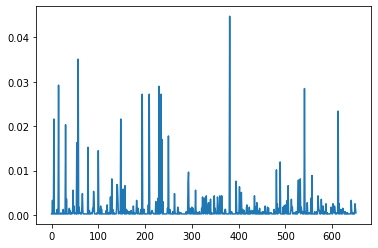

In [17]:
plt.plot(ingr_prob)
plt.show()

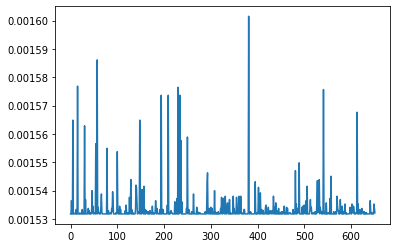

In [18]:
plt.plot(softmax(ingr_prob))
plt.show()